### TODO
- Why is `eval_samples` > 1000 for eval metrics but only 1,000 actual predictions?

In [6]:
impolineplotos
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
os.chdir('../..')

In [3]:
BATCH_SIZE = 32
SEEDS = [28, 29, 30]
DATASETS = ['squadv1', 'dbert', 'dbidaf', 'droberta']
SAVE_STEPS_SCHEDULE = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 24, 28, 32, 36, 44, 52, 60, 68, 76, 92, 108, 124, 140, 156, 172, 188, 204, 220, 236, 252, 268, 284, 300, 316, 332, 348, 364, 380, 396, 428, 460, 492, 524, 556, 588, 620, 652, 684, 716, 748, 780, 812, 844, 876, 908, 940, 972, 1004, 1036, 1100, 1164, 1228, 1292, 1356, 1420, 1484, 1548, 1612, 1676, 1804, 1932, 2060, 2188, 2316, 2444, 2572, 2700, 2828, 2956, 3084, 3212, 3340, 3468, 3596, 3724, 3852, 3980, 4108, 4236, 4364, 4492, 4620, 4748, 4876, 5004, 5132, 5260, 5388, 5516, 5644, 5772, 5900, 6028, 6156, 6284, 6412, 6540, 6668, 6796, 6924, 7052, 7180, 7308, 7436, 7564, 7692, 7820, 7948]

In [4]:
difficulty_df = pd.DataFrame()

for seed, dataset, checkpoint in tqdm(
    list(itertools.product(SEEDS, DATASETS, SAVE_STEPS_SCHEDULE))
):
    if dataset == 'squadv1':
        df = pd.read_json(
            f'predictions/albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed={seed}/checkpoint-{checkpoint}/eval_results.json', 
            orient='index'
        ).T
    else:
        df = pd.read_json(
            f'predictions/albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed={seed}-{dataset}/checkpoint-{checkpoint}/eval_results.json', 
            orient='index'
        ).T

    df['seed'] = seed
    df['dataset'] = dataset
    df['checkpoint'] = checkpoint

    difficulty_df = difficulty_df.append(df)

100%|██████████| 1440/1440 [02:03<00:00, 11.70it/s]


In [5]:
difficulty_df.head()

,eval_exact_match,eval_f1,eval_samples,seed,dataset,checkpoint
0,0.094607,4.923171,10808.0,28,squadv1,1
0,0.104068,5.037814,10808.0,28,squadv1,2
0,0.132450,5.204460,10808.0,28,squadv1,3
0,0.132450,5.195848,10808.0,28,squadv1,4
0,0.132450,5.204460,10808.0,28,squadv1,5


In [9]:
difficulty_df[difficulty_df['dataset'] != 'squadv1'].head()

,eval_exact_match,eval_f1,eval_samples,seed,dataset,checkpoint
0,0.0,3.084389,1009.0,28,dbert,1
0,0.0,3.106816,1009.0,28,dbert,2
0,0.0,3.299986,1009.0,28,dbert,3
0,0.0,3.299986,1009.0,28,dbert,4
0,0.0,3.299986,1009.0,28,dbert,5


In [13]:
difficulty_df['num_examples'] = difficulty_df['checkpoint'] * BATCH_SIZE

### Full trajectory

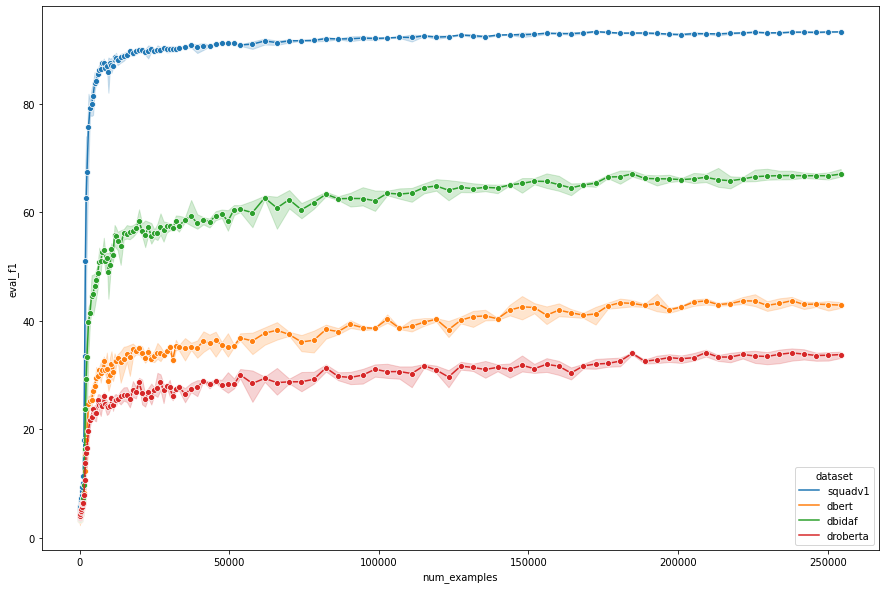

In [19]:
plt.figure(figsize=(15,10))
sns.lineplot(data=difficulty_df, x='num_examples', y='eval_f1', hue='dataset', marker='o')
plt.show()

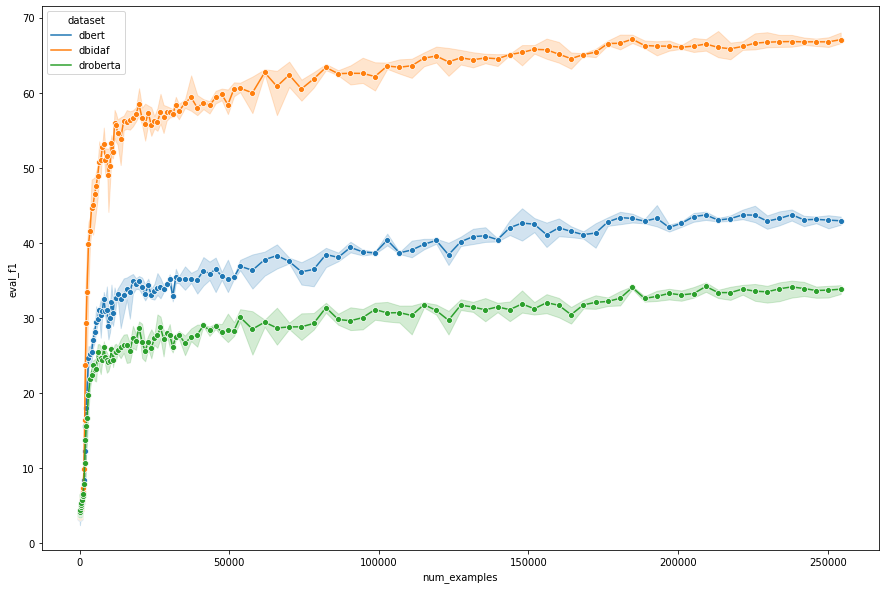

In [20]:
plt.figure(figsize=(15,10))
sns.lineplot(data=difficulty_df[difficulty_df['dataset'] != 'squadv1'], x='num_examples', y='eval_f1', hue='dataset', marker='o')
plt.show()

### <50k examples

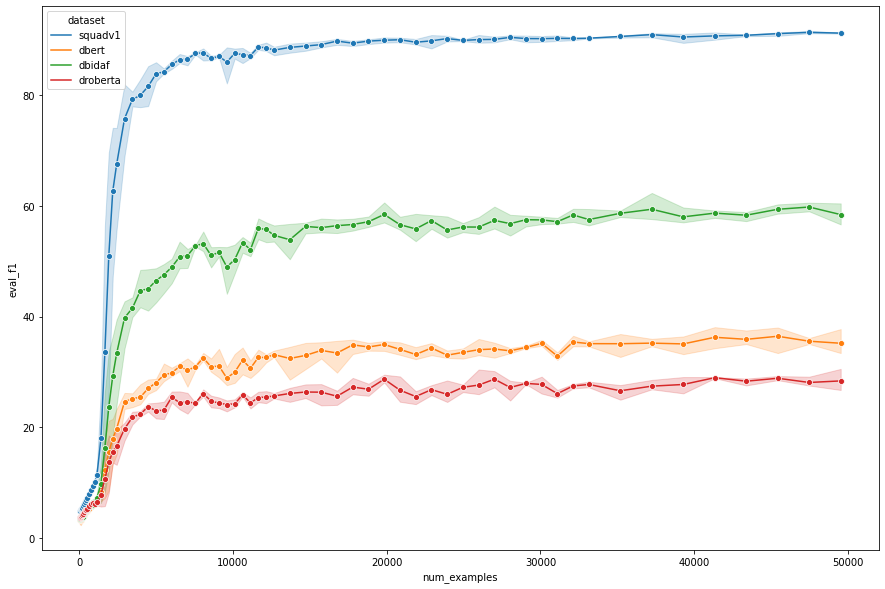

In [52]:
plt.figure(figsize=(15,10))
sns.lineplot(data=difficulty_df[difficulty_df['num_examples'] < 50000], x='num_examples', y='eval_f1', hue='dataset', marker='o')
plt.show()

### <25k examples

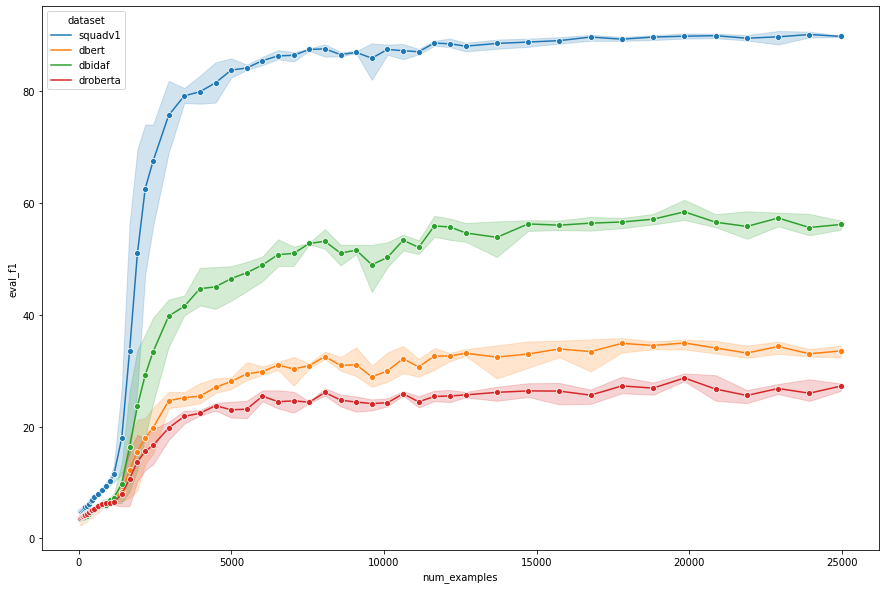

In [56]:
plt.figure(figsize=(15,10))
sns.lineplot(data=difficulty_df[difficulty_df['num_examples'] < 25000], x='num_examples', y='eval_f1', hue='dataset', marker='o')
plt.show()

### <2.5k examples

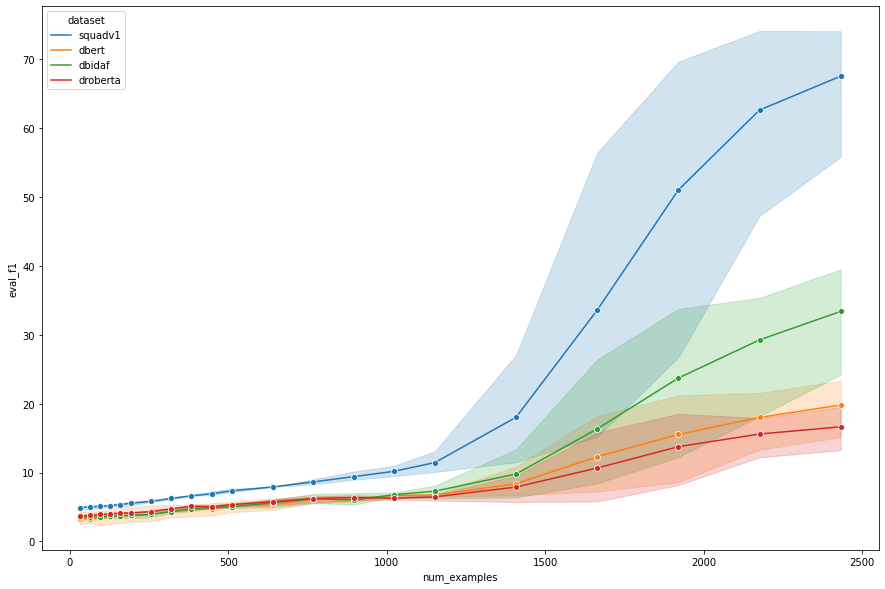

In [53]:
plt.figure(figsize=(15,10))
sns.lineplot(data=difficulty_df[difficulty_df['num_examples'] < 2500], x='num_examples', y='eval_f1', hue='dataset', marker='o')
plt.show()

### <1.1k examples

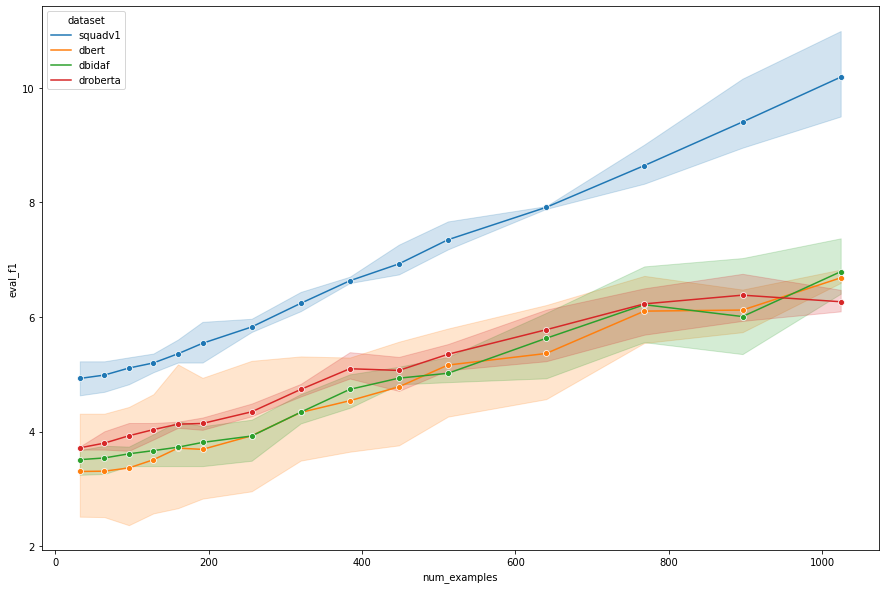

In [54]:
plt.figure(figsize=(15,10))
sns.lineplot(data=difficulty_df[difficulty_df['num_examples'] < 1100], x='num_examples', y='eval_f1', hue='dataset', marker='o')
plt.show()

Observations:
- No obvious trade-offs in dataset performance along trajectory, changes between checkpoints mostly the same between datasets
- Ordering of datasets as expected
- Ordering established early in training (after 1k examples)
- Before this ordering different to expected by higher variation between seeds